# Exploratory Data Analysis

* **Author:** Brian P Josey
* **Date Created:** 2020-11-12
* **Date Modified:** 2021-05-05
* **Language:** Python 3.8.5

In this notebook, I will perform an exploratory data analysis (EDA) on four datasets relevant to my project. Three are stored under `../data/raw` and contain either election results or relevant demographic data:

* `2016-results.csv`: This is the most robust dataset, it contains the results from the 2016 election and demographic data from the US Census Bureau organized by county.
* `2020_US_County_Level_Presidential_Results.csv`: This dataset contains the number of votes each candidate recieved in the 2020 election, and was scraped from *The New York Times*.
* `US_County_Level_Presidential_Results_08-16.csv`: This dataset is the sister of the 2020 dataset above and contains the results from the three prior elections.

Some of the data are repeated across the datasets; this is a result of my attempt to collect data from various sources. I also collected the percentage of the population in each county that lives in an urban environment. That data is stored as `rural_urban.csv` under the `../data/external` folder.

My main goals for this EDA are to

1. Identify what features the datasets contain,
2. Calculate descriptive statistics on those features,
3. Determine if anything is missing, and
4. See if anything interesting stands out to me.

In [1]:
# Import essential packages
import numpy as np
import pandas as pd
from urllib.request import urlopen
import missingno
import json

# Data visualization and plotting
import matplotlib.pyplot as plt
import plotly.express as px

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

## <span style='color:blue'>Creating a Function for Quick EDA</span>

I dound that whenever I perform an EDA, there is a set of functions that I routinely use to get a grasp on the data and see what it contains. Instead of repeating myself on each dataset, I created the function below to run this analysis automatically.

In [2]:
def quick_describe(dataframe):
    '''
    This function gives the shape, summary statistics, and a missingno
    plot for a given dataframe.
    
    Args:
        dataframe (str): Name of dataframe for analysis
        
    Outputs:
        shape: the number of rows by columns of the dataframe
        info: describes the columns of the dataframe and their data types
        describe: give summary statistics for each column
        plot: missingno plot of the dataframe to visualize any missing data
    '''
    # Load dataframe
    df = pd.read_csv(f'../data/raw/{dataframe}')
    
    # Determine and print shape
    shape = df.shape
    print(f'DataFrame\'s dimensions are: {shape}')
    df.info()
    missingno.matrix(df)
    return df.describe()

## <span style='color:blue'>2016 Results</span>

The first dataset I will focus on is also the largest: `2016-results.csv`.

DataFrame's dimensions are: (3143, 159)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Columns: 159 entries, State to Dem08 Frac2
dtypes: float64(147), int64(2), object(10)
memory usage: 3.8+ MB


,Fips,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
count,3143.000000,3111.000000,3.111000e+03,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3111.000000,3111.000000,2601.000000,...,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,30390.411709,54.927997,4.176518e+04,2.229240e+04,2.113845e+04,19201.429306,19526.023136,63.608655,31.679286,0.874781,...,4.208700e+04,4.138286e+04,593.165810,718.383355,0.018472,0.016468,0.607775,0.577527,0.392225,0.422473
std,15164.717720,172.872053,1.134234e+05,7.714042e+04,7.423506e+04,44865.312835,44782.529305,15.619852,15.325975,0.647901,...,1.199522e+05,1.170526e+05,1856.868432,2310.513184,0.009095,0.008552,0.150378,0.140607,0.150378,0.140607
min,1001.000000,1.000000,6.400000e+01,8.000000e+00,5.000000e+00,67.000000,54.000000,4.122067,3.144654,0.000000,...,7.900000e+01,6.400000e+01,0.000000,0.000000,0.000000,0.000000,0.060160,0.065992,0.034722,0.050314
25%,18178.000000,11.000000,4.837000e+03,1.810000e+03,1.558250e+03,2881.250000,2918.000000,54.947224,20.445081,0.447003,...,4.974750e+03,4.837500e+03,71.000000,74.000000,0.012308,0.010618,0.515391,0.486565,0.283582,0.319085
50%,29177.000000,20.000000,1.094800e+04,4.505500e+03,3.999000e+03,6312.000000,6450.500000,66.715489,28.461992,0.717213,...,1.105800e+04,1.080150e+04,169.500000,181.500000,0.017343,0.015728,0.620527,0.581609,0.379473,0.418391
75%,45082.000000,38.000000,2.880700e+04,1.238600e+04,1.136500e+04,16036.000000,16330.000000,75.056740,39.948068,1.098901,...,2.916075e+04,2.847075e+04,446.000000,517.250000,0.023933,0.020763,0.716418,0.680915,0.484609,0.513435
max,56045.000000,4988.000000,2.652072e+06,2.295853e+06,2.216903e+06,956425.000000,885333.000000,95.272727,92.846592,10.875106,...,3.318248e+06,3.181067e+06,65970.000000,78831.000000,0.082317,0.072893,0.965278,0.949686,0.939840,0.934008


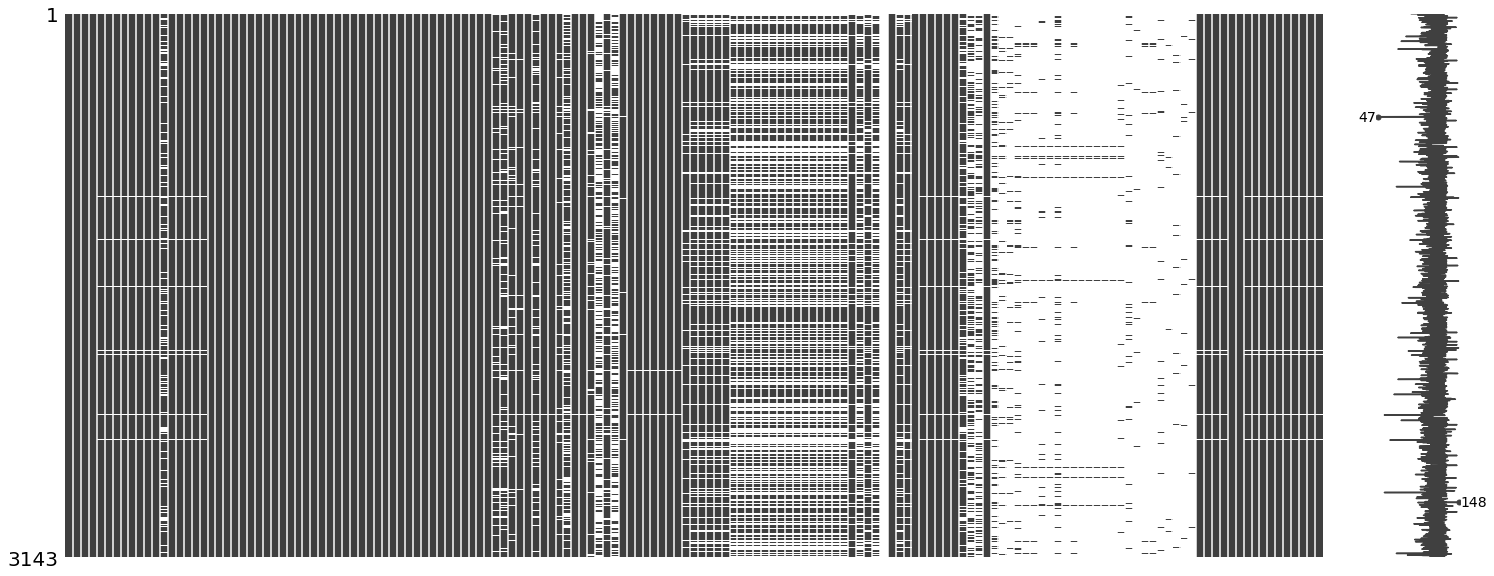

In [3]:
quick_describe('2016-results.csv')

It is immediately clear that the `2016-results.csv` dataset has too many features, 159, to process by hand to get around this, I will load it into a dataframe and then list the names of the columns to understand generally what the data represents.

In [4]:
# Load columns
results_2016 = pd.read_csv('../data/raw/2016-results.csv')

# List column names in a pandas dataframe
list(results_2016.columns)

['State',
 'ST',
 'Fips',
 'County',
 'Precincts',
 'Votes',
 'Democrats 08 (Votes)',
 'Democrats 12 (Votes)',
 'Republicans 08 (Votes)',
 'Republicans 12 (Votes)',
 'Republicans 2016',
 'Democrats 2016',
 'Green 2016',
 'Libertarians 2016',
 'Republicans 2012',
 'Republicans 2008',
 'Democrats 2012',
 'Democrats 2008',
 'Less Than High School Diploma',
 'At Least High School Diploma',
 "At Least Bachelors's Degree",
 'Graduate Degree',
 'School Enrollment',
 'Median Earnings 2010',
 'White (Not Latino) Population',
 'African American Population',
 'Native American Population',
 'Asian American Population',
 'Other Race or Races',
 'Latino Population',
 'Children Under 6 Living in Poverty',
 'Adults 65 and Older Living in Poverty',
 'Total Population',
 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
 'Poverty.Rate.below.federal.poverty.threshold',
 'Gini.Coefficient',
 'Child.Poverty.living.in.families.below.the.poverty.line',
 'Management.professional.and.related.occupations',
 '

By examining the column names, it becomes clear that they fall into a couple of broad categories like number of votes, racial makeup, or geographical information about each county. Some of this data is more interesting than others; it is possible, but unlikely that the average spring temperature will predict the winner of an election. So I will use this dataset to create a new one containing only demographical data in the feature engineering step.

## <span style='color:blue'>Election Results from 2008 to 2016</span>

The next dataset that I will look at is the `US_County_Level_Presidential_Results_08-16.csv` dataset.